<a href="https://colab.research.google.com/github/NYUExperimentalPhysics1-2021/LabAnalysis2/blob/main/lab_2_analysis_example_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Energy vs time - individual traces and fits

For three distributed distances of the large bob from the plate (e.g. 3 mm, 6 mm, 9 mm)

1. Make a new figure
1. Make 2 subplots side by side.
1. In the left subplot, plot the **slope** vs. time since the start of the measurement (time - time[0]) of each dataset on the same graph. Make the [y-axis logarithmic](https://physics.nyu.edu/pine/pymanual/html/chap5/chap5_plot.html#logarithmic-plots). The data should look like a straight line
1. For each experiment you plotted, calculate an exponential fit to the data and store the lifetime (the fit gives you a and b in the equation $s = a e^{b t}$, and $\tau = -\frac{1}{b}$). Store the calculated lifetime in a list called slope_lifetime.
1. Title the plot with the mean and standard deviation of the lifetimes.
1. In the right subplot, do the same thing but with the **amplitude squared**


We've done a lot of this work for you - you will need to fill in the parts indicated by comments below

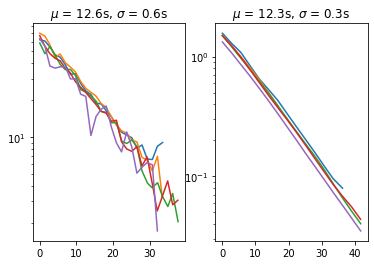

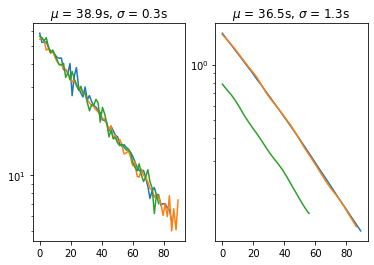

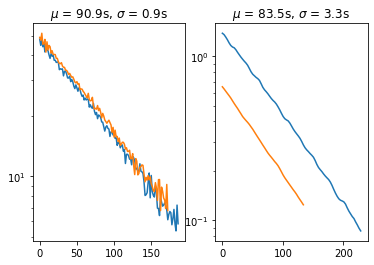

In [ ]:
#code removed

##QUESTIONS - answer below 

1. What evidence do you have that the energy decays exponentially (or that it does not)?
2. Are the slope and amplitude measurements consistent with each other?
3. Based on a visual examination of the graphs, which measurement of the energy of the bob has more noise (slope or amplitude squared)
4. Based on the standard deviation of the lifetime measurements, which measurement of the lifetime (fit to slope or fit to amplitude squared) has less experimental error?
5. If you find that these results disagree unexpectedly, look at the x-axes of the plots. Do the slope and amplitude data cover the same time ranges? The loading function automatically tries to discard noisy data. Does this explain why the slope measurements are shorter than the amplitude measurements?

## Energy vs time - fixed time range

Copy and paste your solution in the code box below. Let's modify it a little so that each experiment covers roughly the same time range within an experimental condition.

The load commands take an optional argument, maxTime that cuts the length of the loaded data to that time range (or shorter if the full range isn't available). Let's redo the excercise above, limiting the time range to 1.5 lifetimes. 

We have to iterate in a slightly different way, so we've written the for loop structure for you - it's your job to fill in the rest

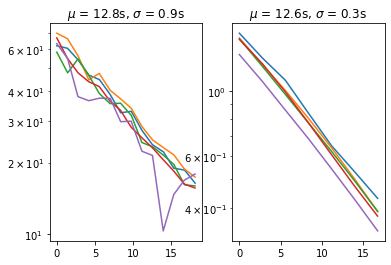

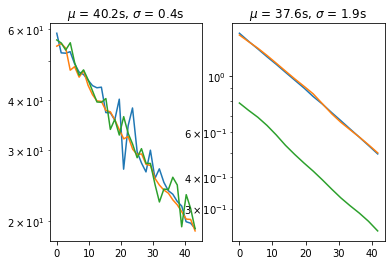

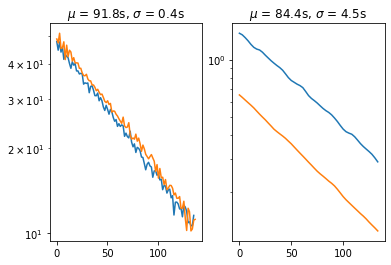

In [ ]:
#code removed

##QUESTIONS - answer below
1. Did shortenting the time range change which method of lifetime measurement had less error?

## Energy vs time - let's look again

If your data looks like mine (and it may not!), there's a bit of a paradox, the slope measurement looks "noisier" - the energy bounces around a lot more from swing to swing - but the lifetime measurement is more consistent from experiment to experiment. Let's have one last look.

Copy your entire code block from above. Make one change: instead of plotting slope or amplitude^2 vs. time, plot slope/a (or amplitude^2/a) vs. time, where a is the fit parameter for slope(t = 0) from your exponential fits. This will make curves with the same lifetimes look identical. 

Hint: change the order, so you first calculate the fit, then make the plot, like this

```
  a,b,*_ = fitExponential(time-time[0], slope) 
  plt.semilogy(time-time[0], slope/a)
```

double hint: this hint may give away an answer to a previous question


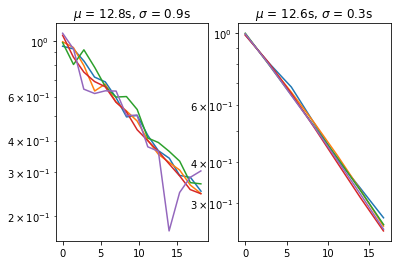

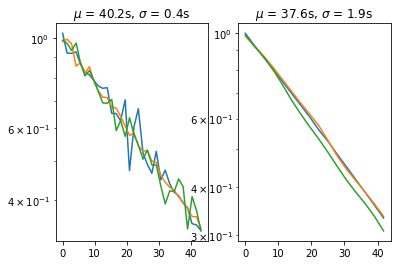

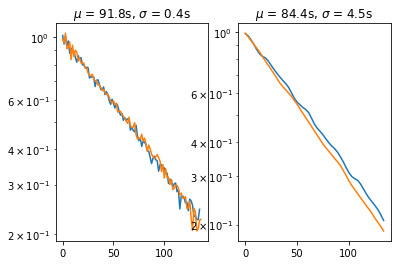

In [ ]:
#code removed

##Questions - answer below

1. Based on these graphs, should you use slope or amplitude squared to measure the lifetime of the bob?
2. What is it called when a measurement has errors that aren't random? Do you think either the slope or amplitude measurements have these kinds of errors?

#Lifetime vs. separation

OK, now let's look at the whole data set. We want to find a relation between the separation and the lifetime. 

We need to do the following:
1. Make a list of all the directories we want analyzed
1. Define a numerical value of the height for each directory. 
1. Loop over all the directories. For each directory
  1. Calculate the lifetime from each experiment. I'm using slope, because I think it was more reliable in my data set. You can use amplitude squared if you think that's better. Justify your choice. 
  1. Find the mean and standard deviation of these lifetimes. 
  1. Calculate the standard error of the mean as the standard deviation over the square root of the number of measurements
1. Make an [error bar plot](https://physics.nyu.edu/pine/pymanual/html/chap5/chap5_plot.html#error-bars) of lifetime vs. separation. My error bars were small enough they were hard to see. How about yours?

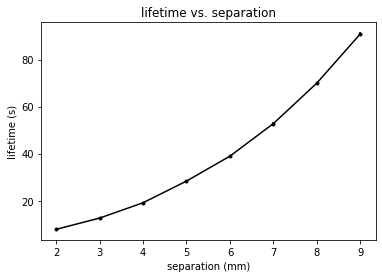

In [ ]:
#code removed

##Fit lifetime vs. height to a power law

if $\tau = a h^b$, then $\log(\tau) = b \log(h) + \log(a)$ 

in other words, a log-log graph will look like a straight line

use the plt.loglog command to plot lifetime (tau) vs separation (lg_h)

use 'bo-' (blue circles connectd by lines) for the line type




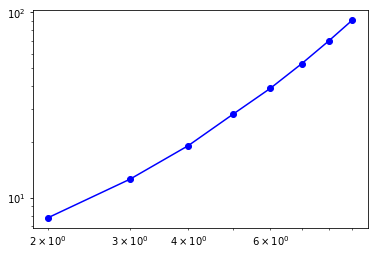

In [ ]:
#code removed

##Fit lifetime vs. height to a power law, take 2

If your data is like mine, this doesn't look like a very straight line. The problem is that the real form is probably something like 

$\tau = a (h + h_0)^b$, and $\log(\tau) = b \log(h+h_0) + \log(a)$ 

where $h_0$ is some offset due to the thickness of the magnet and the aluminum plate. The magnet is 3/16" thick and the plate is 1/8" thick. Together, that's about 8mm of thickness, and the distance between their centers is therefore 4 mm. 

try putting in an offset of 4 mm (plot tau vs. h + 4) and see if it looks more like a straight line. hint, you will have to convert lg_h to a numpy array before you can add 4. 

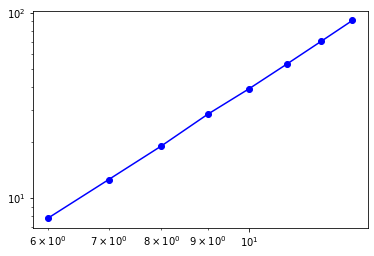

In [ ]:
#code removed

##Well that looks good, but....

Now do the same things for offsets of 3 and 5 mm... Do you still see a straight line?

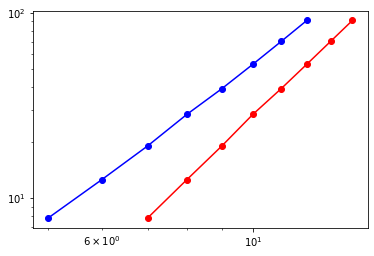

In [ ]:
#code removed

## Use the residuals to find the most likely value of the separation

The residuals (the difference of the measured value from the fit value) can be used to tell you the quality of a fit. Assuming each measurement has equal error, the best fit is the one that minimizes the sum of the square of the residuals

minimize $\sum_h(\tau(h) - \tau_{fit}(h))^2$

below, I've written a function that calculates the sum of the squared residuals for a power law fit, given some offset $h_0$.  Then I make a graph of this sum vs. my guess of $h_0$ 

I need you to write a few lines for me


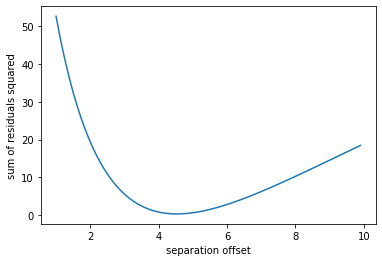

In [ ]:
#code removed

By eye, you might be able to find the best guess for h0, but we can actually ask python to find the true minimum, using scipy.optimize. We'll worry about how this works later, but for now just run the code block below to find the minimum 

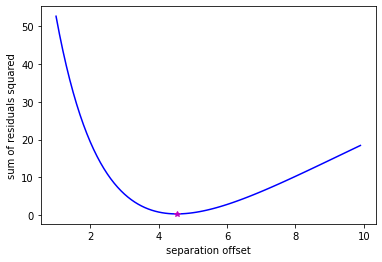

In [ ]:
#code removed

Finally, using the best value of the separation (h0) you calculated above, find the power law exponent and plot the data and the fit for lifetime vs. separation together. 

Then, in another figure, plot the residuals with the error bars of the measurements.. x:lg_h, y: lg_tau - $\tau_{fit}$, error bars: lg_tau_sem



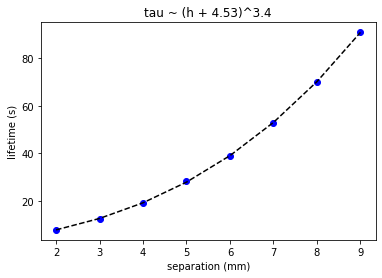

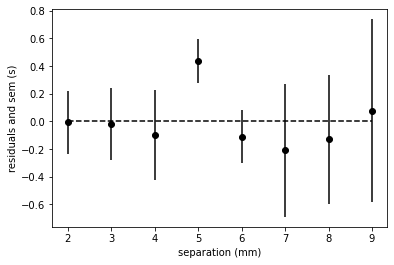

In [ ]:
#code removed

#Small bob time!

Please reuse the analysis steps you did above to make a plot of lifetime vs separation for the small bob, along with a power law fit.

Then make two additional plots
1. Plot lifetime vs. separation for the large and small bobs on the same graph. Use blue circles for the large bob and red circles for the small bob. Add a legend to the plot.
2. Make the same plot, but this time, multiply the small bob lifetime by (4/3)^3. Does this analysis support the relation $\tau \propto m_{bob}$?



#A few more questions

The total energy of the bob is $E = \frac{1}{2} m (A * 2\pi / T)^2$, where $m$ is the mass, $A$ is the amplitude, and $T$ is the period. The rate of energy loss is $-\frac{dE}{dt} = E/\tau$, where $\tau$ is the lifetime. For the large bob, please calculate the following, to 1 significant figure (e.g. 10 J, not 10.231 J)
1. The total energy when A = 10 cm
1. The total energy when A = 1 cm
1. The rate of energy loss for a separation of 2 mm, when A = 10 cm and A = 1 cm
1. The rate of energy loss for a separation of 10 mm (or whatever your maximum separation was), when A = 10 cm and A = 1 cm
